In [659]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [660]:
df = pd.read_csv("diabetes.csv")
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [661]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


array([[<Axes: title={'center': 'Pregnancies'}>,
        <Axes: title={'center': 'Glucose'}>,
        <Axes: title={'center': 'BloodPressure'}>],
       [<Axes: title={'center': 'SkinThickness'}>,
        <Axes: title={'center': 'Insulin'}>,
        <Axes: title={'center': 'BMI'}>],
       [<Axes: title={'center': 'DiabetesPedigreeFunction'}>,
        <Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Outcome'}>]], dtype=object)

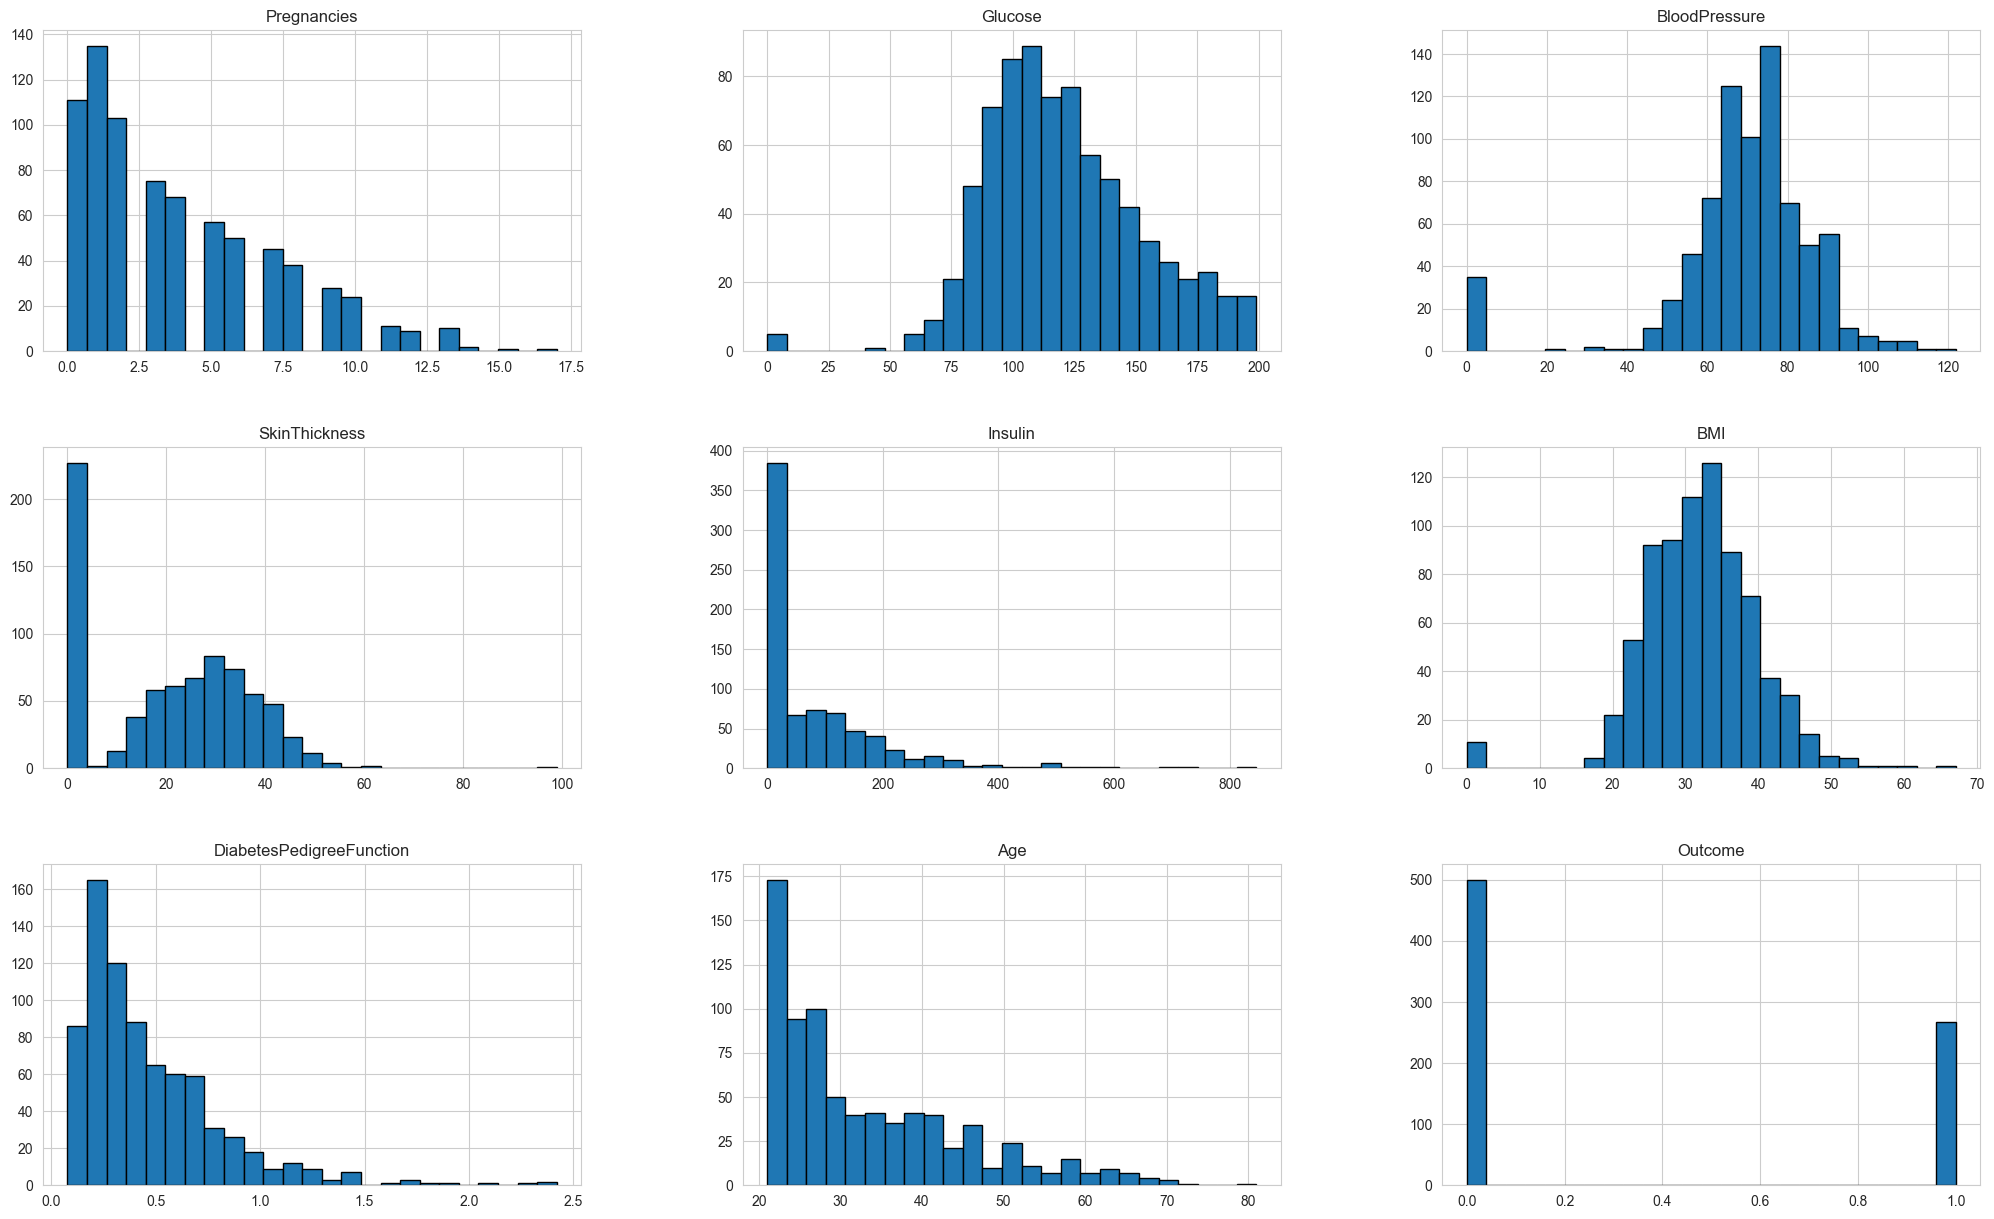

In [662]:
df.hist(bins=25, figsize=(25,15), edgecolor='black')

In [663]:
# Usuń wiersze, gdzie kolumna 'x' == 0
columns_to_check = ['BMI', 'Insulin', 'Glucose', 'SkinThickness']
df_filtered = df[(df[columns_to_check] != 0).all(axis=1)]
df_filtered = df_filtered.rename(columns = {'DiabetesPedigreeFunction' : 'DPF'})
df_filtered

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DPF,Age,Outcome
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
6,3,78,50,32,88,31.0,0.248,26,1
8,2,197,70,45,543,30.5,0.158,53,1
13,1,189,60,23,846,30.1,0.398,59,1
...,...,...,...,...,...,...,...,...,...
753,0,181,88,44,510,43.3,0.222,26,1
755,1,128,88,39,110,36.5,1.057,37,1
760,2,88,58,26,16,28.4,0.766,22,0
763,10,101,76,48,180,32.9,0.171,63,0


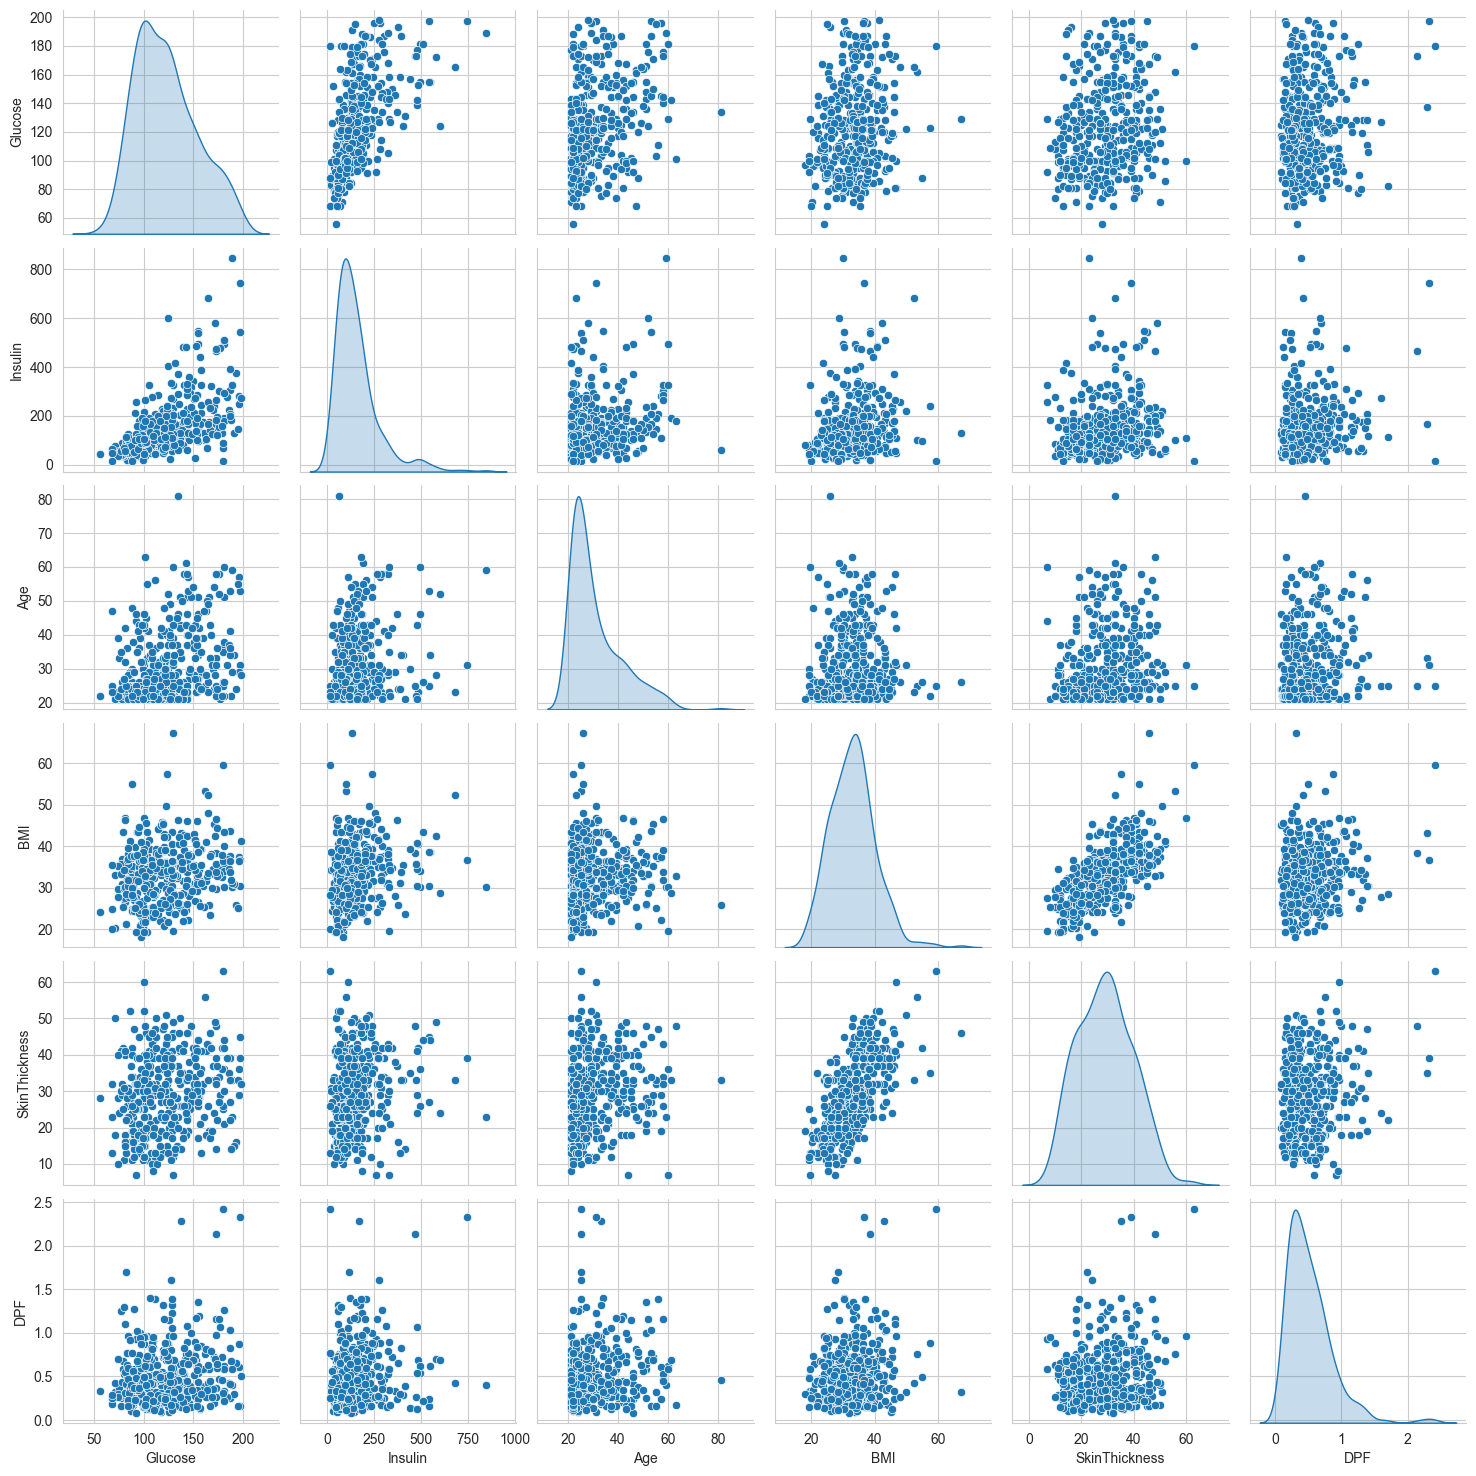

In [664]:
sns.pairplot(df_filtered[['Glucose', 'Insulin','Age', "BMI", 'SkinThickness', 'DPF']],
diag_kind='kde')

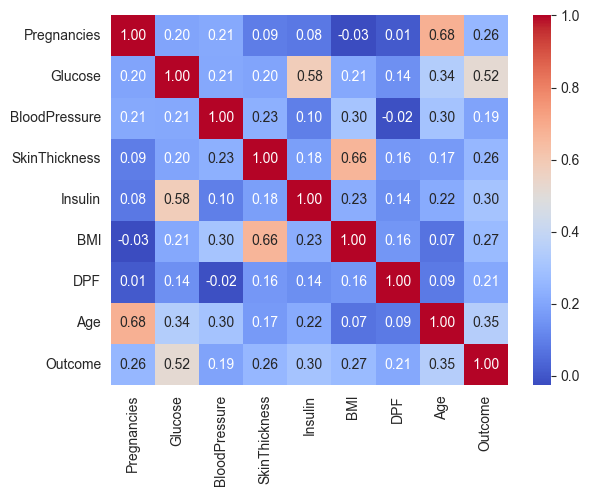

In [665]:
plt.Figure(figsize=(20,15))
sns.heatmap(df_filtered.corr(),annot=True, fmt=".2f",  cmap="coolwarm")
plt.show()

In [666]:
import statsmodels.api as sm
X = df_filtered[['Glucose', 'BMI', 'Age', 'DPF']]
X = sm.add_constant(X)
y = df_filtered['Outcome']
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                Outcome   R-squared:                       0.340
Model:                            OLS   Adj. R-squared:                  0.333
Method:                 Least Squares   F-statistic:                     49.80
Date:                Fri, 11 Apr 2025   Prob (F-statistic):           8.50e-34
Time:                        18:45:22   Log-Likelihood:                -179.53
No. Observations:                 392   AIC:                             369.1
Df Residuals:                     387   BIC:                             388.9
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.1184      0.116     -9.601      0.0

In [667]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((254, 5), (138, 5), (254,), (138,))

In [668]:
print("Liczba przypadków cukrzycy w treningu:", y_train.sum())

Liczba przypadków cukrzycy w treningu: 87


In [669]:
# 1. Inicjalizacja modelu
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(
    penalty='l2',       
    C=0.1,              
    solver='liblinear', 
    max_iter=1000
)
model.fit(X_train, y_train)

# Prawdopodobieństwa
probabilities = model.predict_proba(X_test)[:, 1]  

In [670]:
from sklearn.metrics import classification_report, confusion_matrix

# Predykcje i prawdopodobieństwa
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]

print("Raport klasyfikacyjny:\n", classification_report(y_test, y_pred))
print("Macierz pomyłek:\n", confusion_matrix(y_test, y_pred))

Raport klasyfikacyjny:
               precision    recall  f1-score   support

           0       0.75      0.89      0.82        95
           1       0.60      0.35      0.44        43

    accuracy                           0.72       138
   macro avg       0.68      0.62      0.63       138
weighted avg       0.70      0.72      0.70       138

Macierz pomyłek:
 [[85 10]
 [28 15]]


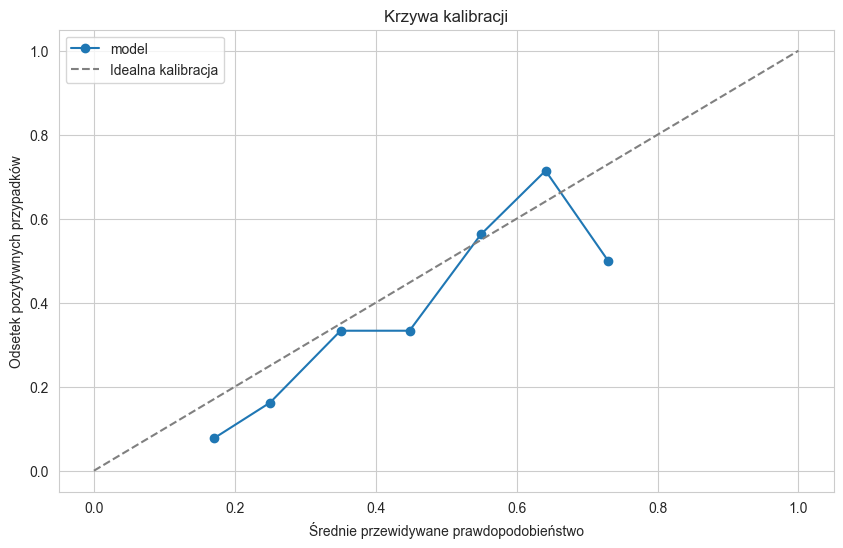

In [671]:
from sklearn.calibration import calibration_curve

prob_true, prob_pred = calibration_curve(y_test, y_proba, n_bins=10)

plt.figure(figsize=(10, 6))
plt.plot(prob_pred, prob_true, marker='o', label='model')
plt.plot([0, 1], [0, 1], linestyle='--', color='grey', label='Idealna kalibracja')
plt.title('Krzywa kalibracji')
plt.xlabel('Średnie przewidywane prawdopodobieństwo')
plt.ylabel('Odsetek pozytywnych przypadków')
plt.legend()
plt.show()

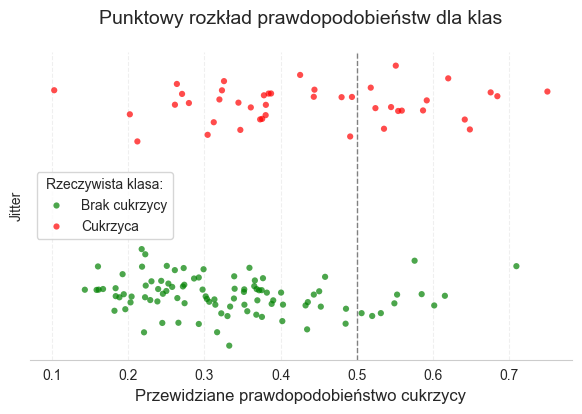

In [672]:
import seaborn as sns
import pandas as pd
import numpy as np

plot_df = pd.DataFrame({
    'Przewidziane prawdopodobieństwo': y_proba,
    'Klasa': y_test.map({0: 'Brak cukrzycy', 1: 'Cukrzyca'})  # Tekstowe etykiety
})

# "jitter" do osi Y
np.random.seed(42)  # Dla reprodukowalności
plot_df['Jitter'] = np.where(
    plot_df['Klasa'] == 'Brak cukrzycy', 
    np.random.normal(-0.1, 0.02, len(plot_df)),  # Punkty klasy 0 lekko poniżej 0
    np.random.normal(0.1, 0.02, len(plot_df))    # Punkty klasy 1 lekko powyżej 0
)

# Wykres
plt.figure(figsize=(7, 4))
sns.scatterplot(
    data=plot_df,
    x='Przewidziane prawdopodobieństwo',
    y='Jitter',
    hue='Klasa',
    palette={'Brak cukrzycy': 'green', 'Cukrzyca': 'red'},
    alpha=0.7,
    s=20,
    edgecolor='none'
)

# Formatowanie
plt.axvline(0.5, color='grey', linestyle='--', linewidth=1)
plt.title('Punktowy rozkład prawdopodobieństw dla klas', pad=20, fontsize=14)
plt.xlabel('Przewidziane prawdopodobieństwo cukrzycy', fontsize=12)
plt.yticks([])  # Ukryj oś Y (jitter jest tylko dla wizualizacji)
plt.legend(title='Rzeczywista klasa:', loc='center left')
sns.despine(left=True)  # Usuń lewą oś
plt.grid(axis='x', linestyle='--', alpha=0.3)
plt.show()

Kluczowe obserwacje
Rozkład klas:

Brak cukrzycy (czerwone punkty):

Większość punktów skupia się na lewej stronie (niższe prawdopodobieństwo).

Niektóre punkty przekraczają próg 0.5 – oznacza to fałszywie pozytywne (FP) wyniki.

Cukrzyca (zielone punkty):

Punkty rozłożone są szeroko, od niskich do umiarkowanych prawdopodobieństw.

Niewiele punktów przekracza próg 0.5 – model rzadko jest pewny diagnozy cukrzycy.

Separacja klas:

Widoczna częściowa separacja między klasami.

Nakładanie się w zakresie 0.3–0.6 wskazuje, że model ma trudności z rozróżnieniem części przypadków.

Próg klasyfikacji (0.5):

Dominują przypadki FP (czerwone punkty po prawej) nad TP (zielone punkty po prawej).

Sugeruje to, że domyślny próg 0.5 może nie być optymalny.

Należy pamiętać, że rozmiar zbioru danych (392 rekordy) znacząco wpływa na jakość i stabilność modelu, zwłaszcza w kontekście medycznym.